In [ ]:
#loading data from kaggle api
# !kaggle competitions download -c mitsui-commodity-prediction-challenge

In [ ]:
#unzipping data
# !unzip mitsui-commodity-prediction-challenge.zip

In [ ]:
# imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.style.use('seaborn-v0_8-darkgrid')
pd.options.display.float_format = '{:,.4f}'.format

In [ ]:
# 2. Load Data
target_pairs = pd.read_csv("../data/target_pairs.csv")
train_labels = pd.read_csv("../data/train_labels.csv")
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")
test_labels_lag_1 = pd.read_csv("../data/lagged_test_labels/test_labels_lag_1.csv")
test_labels_lag_2 = pd.read_csv("../data/lagged_test_labels/test_labels_lag_2.csv")
test_labels_lag_3 = pd.read_csv("../data/lagged_test_labels/test_labels_lag_3.csv")
test_labels_lag_4 = pd.read_csv("../data/lagged_test_labels/test_labels_lag_4.csv")

In [ ]:
# setting base date and conversion of dates

# base_date = pd.Timestamp("2000-01-01")
# train['date_id'] = pd.to_timedelta(train['date_id'], unit='D') + base_date
# train_labels['date_id'] = pd.to_timedelta(train_labels['date_id'], unit='D') + base_date

In [ ]:
EXCHANGES = ["LME","JPX","US","FX"]
LME = []
JPX = []
US = []
FX = []
for i in train.columns:
  # print(i)
    if i.startswith(EXCHANGES[0]):
        LME.append(i)
    elif i.startswith(EXCHANGES[1]):
        JPX.append(i)
    elif i.startswith(EXCHANGES[2]):
        US.append(i)
    elif i.startswith(EXCHANGES[3]):
        FX.append(i)

In [ ]:
train_labels.columns

Index(['date_id', 'target_0', 'target_1', 'target_2', 'target_3', 'target_4',
       'target_5', 'target_6', 'target_7', 'target_8',
       ...
       'target_414', 'target_415', 'target_416', 'target_417', 'target_418',
       'target_419', 'target_420', 'target_421', 'target_422', 'target_423'],
      dtype='object', length=425)

In [ ]:
test_labels_lag_1[["date_id","target_0","target_1","target_2","target_3","label_date_id"]]

,date_id,target_0,target_1,target_2,target_3,label_date_id
0,1829,NaN,NaN,0.0179,-0.0002,1827
1,1830,0.0026,-0.0046,-0.0018,0.0003,1828
2,1831,0.0053,-0.0145,0.0195,0.0146,1829
3,1832,0.0001,-0.0052,0.0115,0.0133,1830
4,1833,-0.0115,0.0166,-0.0238,-0.0187,1831
...,...,...,...,...,...,...
129,1958,0.0028,-0.0045,-0.0015,-0.0030,1956
130,1959,0.0114,-0.0010,0.0004,-0.0035,1957
131,1960,-0.0027,-0.0020,0.0011,0.0050,1958
132,1961,0.0021,-0.0063,-0.0039,0.0027,1959


In [ ]:
train_labels = train_labels.set_index("date_id")
train_labels

,target_0,target_1,target_2,target_3,target_4,target_5,target_6,target_7,target_8,target_9,...,target_414,target_415,target_416,target_417,target_418,target_419,target_420,target_421,target_422,target_423
date_id,,,,,,,,,,,,,,,,,,,,,
0,0.0059,-0.0029,-0.0047,-0.0006,NaN,NaN,-0.0067,0.0061,NaN,0.0034,...,NaN,0.0212,-0.0056,NaN,-0.0046,0.0338,NaN,0.0382,NaN,0.0273
1,0.0058,-0.0241,-0.0071,-0.0190,-0.0319,-0.0195,0.0030,-0.0069,-0.0020,0.0213,...,0.0034,0.0214,-0.0015,0.0128,0.0105,0.0305,-0.0008,0.0250,0.0035,0.0209
2,0.0010,0.0238,-0.0089,-0.0221,NaN,NaN,0.0374,0.0077,NaN,-0.0268,...,-0.0067,0.0093,0.0019,-0.0128,-0.0023,0.0175,-0.0054,0.0048,-0.0091,0.0017
3,0.0017,-0.0246,0.0119,0.0048,NaN,NaN,-0.0125,-0.0169,NaN,0.0148,...,NaN,0.0369,-0.0152,NaN,0.0081,0.0011,NaN,-0.0151,NaN,-0.0330
4,-0.0033,0.0052,0.0069,0.0133,0.0240,0.0107,-0.0116,0.0020,0.0039,-0.0090,...,NaN,0.0049,NaN,-0.0067,-0.0161,-0.0049,NaN,NaN,0.0095,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1956,0.0028,-0.0045,-0.0015,-0.0030,NaN,NaN,-0.0063,0.0013,NaN,0.0022,...,NaN,0.0101,0.0092,NaN,0.0095,0.0043,NaN,0.0053,NaN,-0.0414
1957,0.0114,-0.0010,0.0004,-0.0035,-0.0081,-0.0134,0.0132,-0.0081,0.0053,-0.0064,...,-0.0060,-0.0076,0.0216,0.0080,0.0157,-0.0010,0.0010,0.0160,0.0046,-0.0286
1958,-0.0027,-0.0020,0.0011,0.0050,0.0168,0.0205,-0.0032,-0.0022,0.0130,0.0079,...,-0.0260,-0.0078,0.0057,-0.0204,0.0267,0.0071,0.0048,-0.0026,-0.0336,-0.0076


In [ ]:
target_pairs

,target,lag,pair
0,target_0,1,US_Stock_VT_adj_close
1,target_1,1,LME_PB_Close - US_Stock_VT_adj_close
2,target_2,1,LME_CA_Close - LME_ZS_Close
3,target_3,1,LME_AH_Close - LME_ZS_Close
4,target_4,1,LME_AH_Close - JPX_Gold_Standard_Futures_Close
...,...,...,...
419,target_419,4,FX_NOKUSD - LME_AH_Close
420,target_420,4,JPX_Gold_Standard_Futures_Close - US_Stock_RY_...
421,target_421,4,US_Stock_EWT_adj_close - LME_AH_Close
422,target_422,4,JPX_Platinum_Standard_Futures_Close - FX_NOKCHF


In [ ]:
target_pairs[["target","pair"]].query("target == 'target_0'")

,target,pair
0,target_0,US_Stock_VT_adj_close


In [ ]:
import warnings
def generate_log_returns(data, lag):
    log_returns = pd.Series(np.nan, index=data.index)

    # Compute log returns based on the rules
    for t in range(len(data)):
        with warnings.catch_warnings():
            warnings.simplefilter('ignore')
            try:
                log_returns.iloc[t] = np.log(data.iloc[t + lag + 1] / data.iloc[t + 1])
            except Exception:
                log_returns.iloc[t] = np.nan
    return log_returns


def generate_targets(column_a: pd.Series, column_b: pd.Series, lag: int) -> pd.Series:
    a_returns = generate_log_returns(column_a, lag)
    b_returns = generate_log_returns(column_b, lag)
    return a_returns - b_returns

In [ ]:
generate_targets(train['LME_CA_Close'], train['US_Stock_CCJ_adj_close'], 4)

,0
0,0.0273
1,0.0209
2,0.0017
3,-0.0330
4,NaN
...,...
1956,NaN
1957,NaN
1958,NaN
1959,NaN


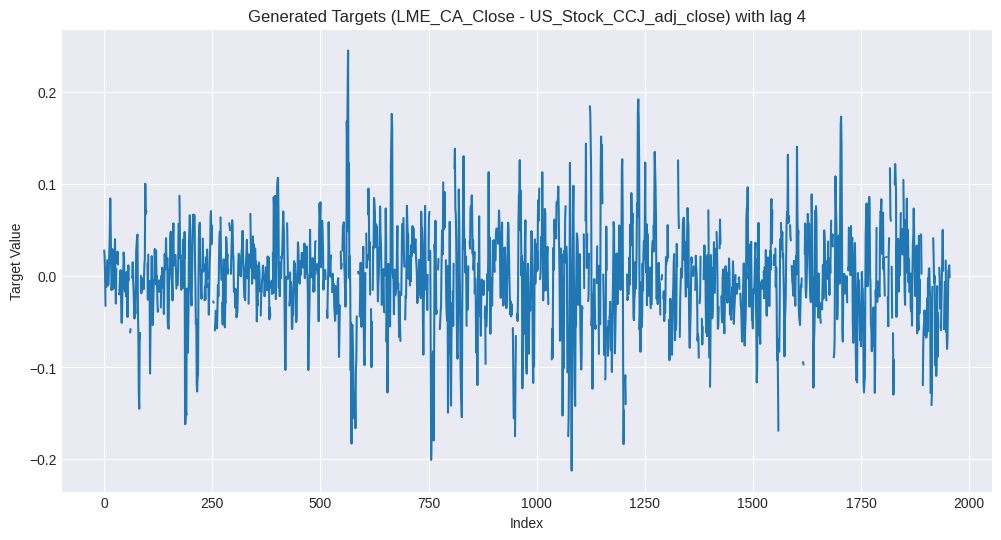

In [ ]:
generated_targets = generate_targets(train['LME_CA_Close'], train['US_Stock_CCJ_adj_close'], 4)
plt.figure(figsize=(12, 6))
plt.plot(generated_targets)
plt.title('Generated Targets (LME_CA_Close - US_Stock_CCJ_adj_close) with lag 4')
plt.xlabel('Index')
plt.ylabel('Target Value')
plt.show()

lets do target_52


In [ ]:
target, lag, pair = target_pairs.query("target == 'target_52'").values[0]
lag

1

In [ ]:
random_pair_info = target_pairs.sample(1).values[0]
random_target, random_lag, random_pair_str = random_pair_info
print(f"Random Target: {random_target}")
print(f"Random Lag: {random_lag}")
print(f"Random Pair: {random_pair_str}")

Random Target: target_25
Random Lag: 1
Random Pair: LME_AH_Close - US_Stock_VEA_adj_close


In [ ]:
target_pairs.query("target == 'target_52'").values[0]

array(['target_52', 1,
       'US_Stock_CAT_adj_close - JPX_Gold_Standard_Futures_Close'],
      dtype=object)

In [ ]:
generate_targets(train['US_Stock_CAT_adj_close'], train['JPX_Gold_Standard_Futures_Close'], 1)

,0
0,NaN
1,0.0052
2,NaN
3,NaN
4,0.0070
...,...
1956,NaN
1957,0.0194
1958,0.0228
1959,NaN


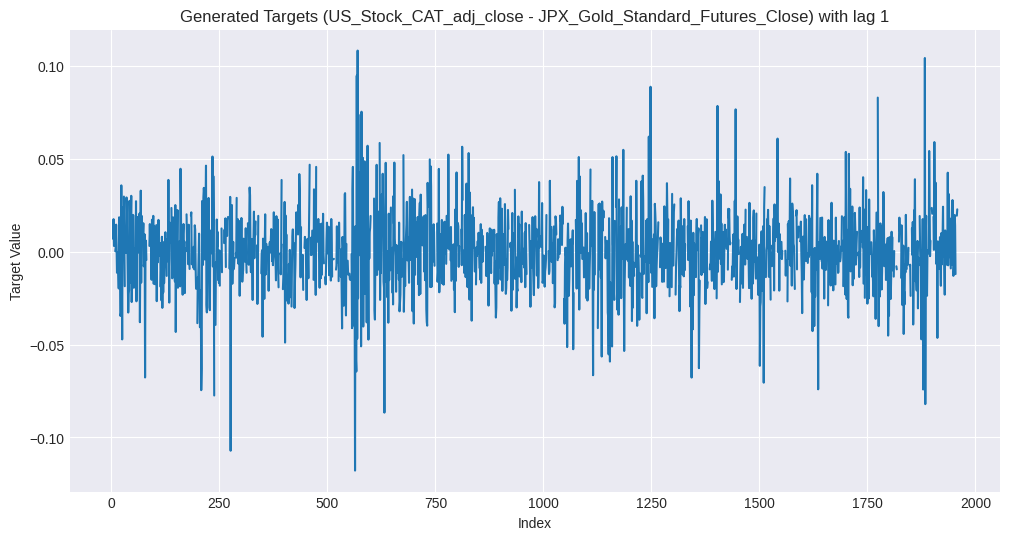

In [ ]:
pair = target_pairs.query("target == 'target_52'").values[0][2]
lag = target_pairs.query("target == 'target_52'").values[0][1]
pair_columns = pair.split(' - ')
comm1 = pair_columns[0]
comm2 = pair_columns[1]

# Generate targets for the random pair
generated_targets = generate_targets(train[comm1], train[comm2], lag)

# Plot the generated targets
plt.figure(figsize=(12, 6))
plt.plot(generated_targets)
plt.title(f'Generated Targets ({pair}) with lag {lag}')
plt.xlabel('Index')
plt.ylabel('Target Value')
plt.show()

In [ ]:
df = generate_targets(train[comm1], train[comm2], lag)
df

,0
0,NaN
1,0.0052
2,NaN
3,NaN
4,0.0070
...,...
1956,NaN
1957,0.0194
1958,0.0228
1959,NaN


In [ ]:
test_labels_lag_1[["date_id","target_52","label_date_id"]]

,date_id,target_52,label_date_id
0,1829,NaN,1827
1,1830,-0.0140,1828
2,1831,0.0142,1829
3,1832,0.0046,1830
4,1833,-0.0287,1831
...,...,...,...
129,1958,NaN,1956
130,1959,0.0194,1957
131,1960,0.0228,1958
132,1961,0.0101,1959


In [ ]:
train[["date_id",comm1,comm2]]

,date_id,US_Stock_CAT_adj_close,JPX_Gold_Standard_Futures_Close
0,0,132.7149,NaN
1,1,132.9177,NaN
2,2,134.7431,"4,730.0000"
3,3,136.8728,"4,780.0000"
4,4,140.3123,NaN
...,...,...,...
1956,1956,413.7100,"16,090.0000"
1957,1957,411.5722,NaN
1958,1958,418.7183,"16,221.0000"
1959,1959,429.1564,"16,306.0000"


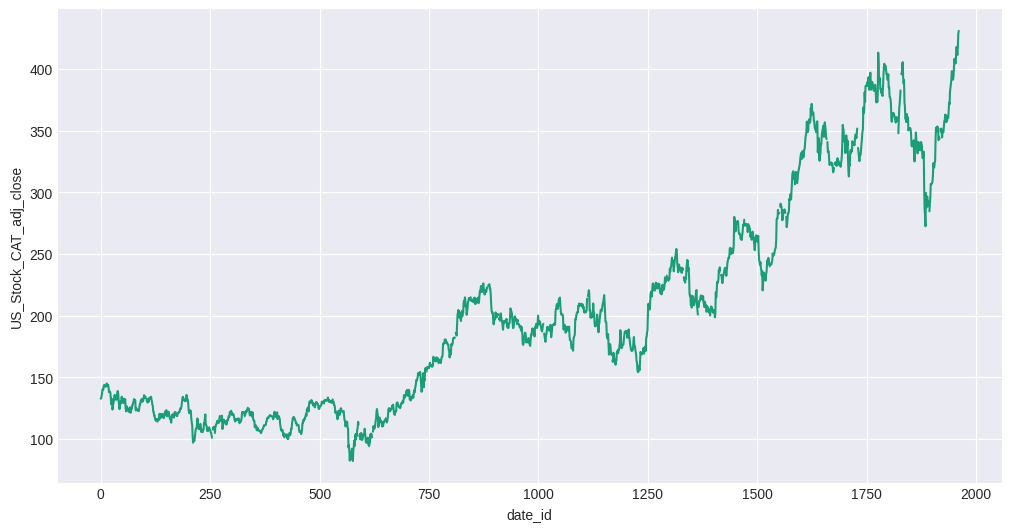

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date_id']
  ys = series['US_Stock_CAT_adj_close']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('date_id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date_id')
_ = plt.ylabel('US_Stock_CAT_adj_close')

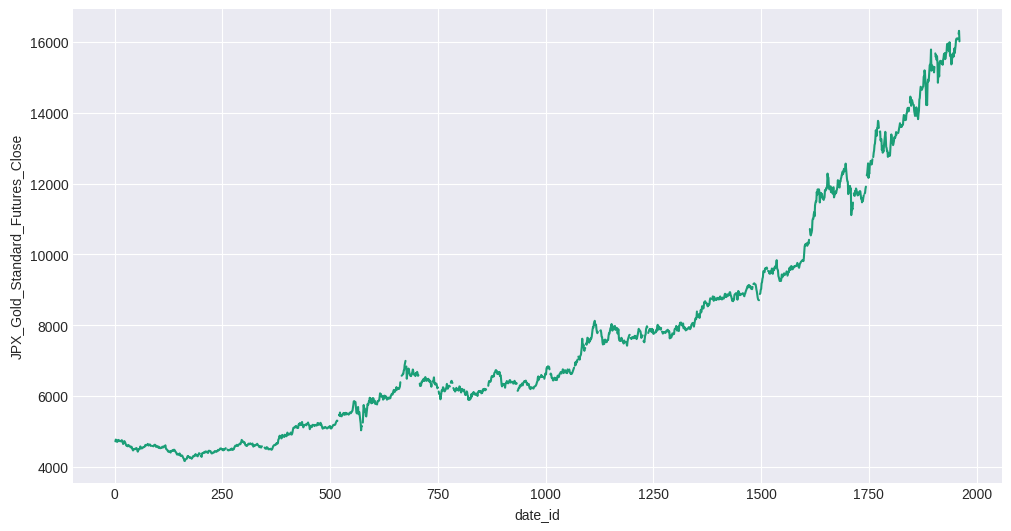

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date_id']
  ys = series['JPX_Gold_Standard_Futures_Close']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('date_id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date_id')
_ = plt.ylabel('JPX_Gold_Standard_Futures_Close')

In [ ]:
delta = pd.DataFrame({'date_id': train['date_id'], comm1: train[comm1], comm2: train[comm2], 'target_calculated': train[comm1] - train[comm2]})
delta

,date_id,US_Stock_CAT_adj_close,JPX_Gold_Standard_Futures_Close,target_calculated
0,0,132.7149,NaN,NaN
1,1,132.9177,NaN,NaN
2,2,134.7431,"4,730.0000","-4,595.2569"
3,3,136.8728,"4,780.0000","-4,643.1272"
4,4,140.3123,NaN,NaN
...,...,...,...,...
1956,1956,413.7100,"16,090.0000","-15,676.2900"
1957,1957,411.5722,NaN,NaN
1958,1958,418.7183,"16,221.0000","-15,802.2817"
1959,1959,429.1564,"16,306.0000","-15,876.8436"


In [ ]:
delta = delta[["date_id","target_calculated"]]
delta

,date_id,target_calculated
0,0,NaN
1,1,NaN
2,2,"-4,595.2569"
3,3,"-4,643.1272"
4,4,NaN
...,...,...
1956,1956,"-15,676.2900"
1957,1957,NaN
1958,1958,"-15,802.2817"
1959,1959,"-15,876.8436"


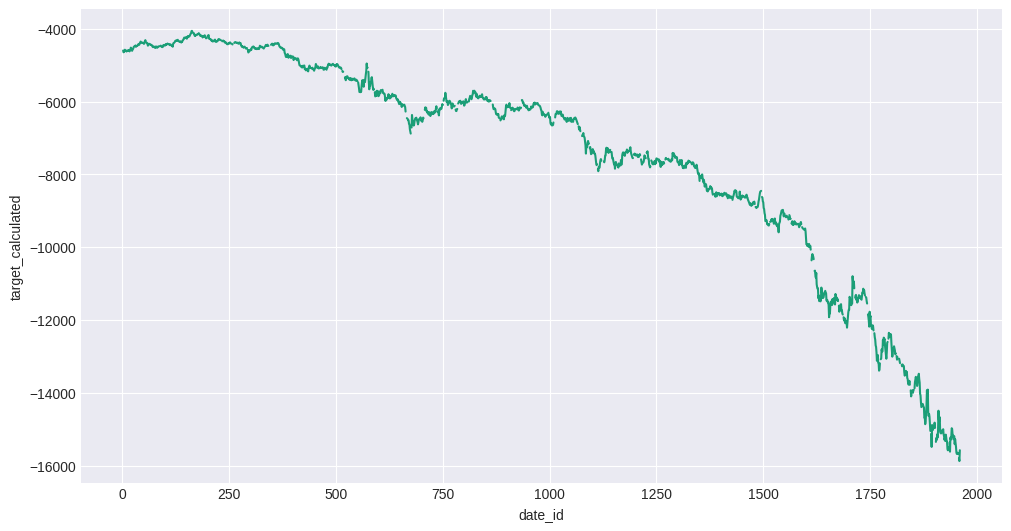

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date_id']
  ys = series['target_calculated']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = delta.sort_values('date_id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date_id')
_ = plt.ylabel('target_calculated')

In [ ]:
test_labels_lag_1[["date_id","target_52"]]

,date_id,target_52
0,1829,NaN
1,1830,-0.0140
2,1831,0.0142
3,1832,0.0046
4,1833,-0.0287
...,...,...
129,1958,NaN
130,1959,0.0194
131,1960,0.0228
132,1961,0.0101


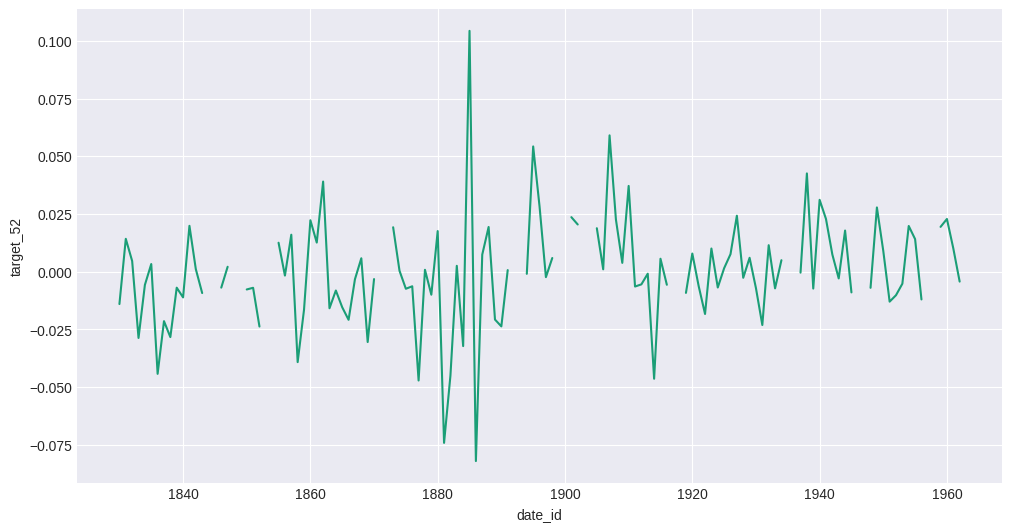

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date_id']
  ys = series['target_52']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('date_id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date_id')
_ = plt.ylabel('target_52')

In [ ]:
first_date = test_labels_lag_1["date_id"].min()
last_date = test_labels_lag_1["date_id"].max()
print(f"First date: {first_date}")
print(f"Last date: {last_date}")

First date: 1829
Last date: 1962


In [ ]:
filtered_delta_df = delta[(delta['date_id'] >= first_date) & (delta['date_id'] <= last_date)]
display(filtered_delta_df)

,date_id,target_calculated
1829,1829,"-13,264.5489"
1830,1830,"-13,432.2953"
1831,1831,"-13,529.5474"
1832,1832,"-13,506.3233"
1833,1833,"-13,479.9127"
...,...,...
1956,1956,"-15,676.2900"
1957,1957,NaN
1958,1958,"-15,802.2817"
1959,1959,"-15,876.8436"


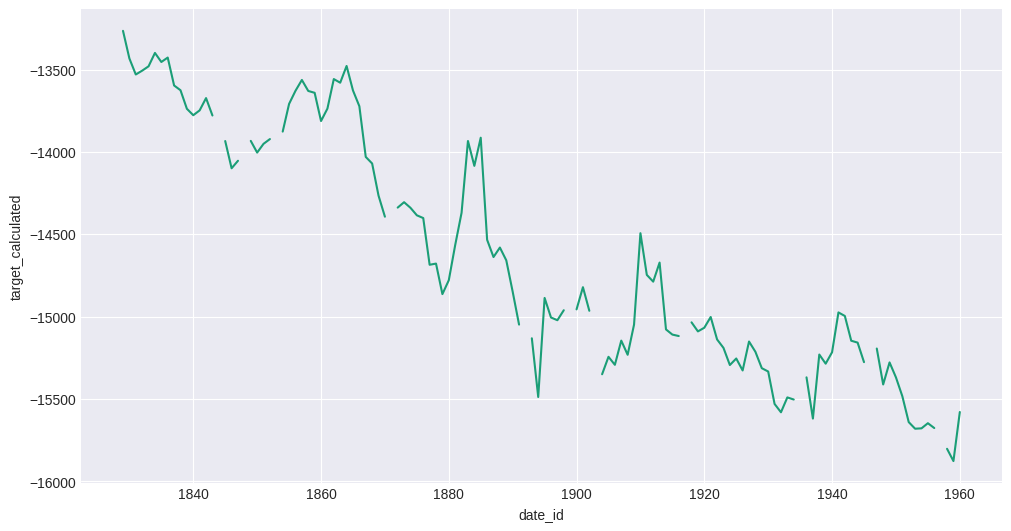

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date_id']
  ys = series['target_calculated']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = filtered_delta_df.sort_values('date_id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date_id')
_ = plt.ylabel('target_calculated')

In [ ]:
test[["date_id",comm1,comm2]]

,date_id,US_Stock_CAT_adj_close,JPX_Gold_Standard_Futures_Close
0,1827,382.7670,"13,641.0000"
1,1828,NaN,"13,670.0000"
2,1829,396.4511,"13,661.0000"
3,1830,395.7047,"13,828.0000"
4,1831,404.4526,"13,934.0000"
...,...,...,...
129,1956,413.7100,"16,090.0000"
130,1957,411.5722,NaN
131,1958,418.7183,"16,221.0000"
132,1959,429.1564,"16,306.0000"
